# Binning

## Apa itu Binning ?
Data binning atau bucketing adalah metode pra-pemrosesan data yang digunakan untuk mengurangi dampak kesalahan pengamatan. Nilai data asli dibagi ke dalam interval-interval kecil yang disebut bin, lalu nilai-nilai tersebut digantikan oleh suatu nilai umum yang dihitung untuk setiap bin tersebut. Metode ini memiliki efek menghaluskan (smoothing) pada data masukan dan juga dapat mengurangi risiko overfitting terutama pada kasus dataset yang kecil.

Ada beberapa metode di data mining (data mining methods) yang memerlukan diskritisasi (discretization) sebelumnya diantaranya adalah  

**1. Naive Bayes Classifier**  

**Mengapa butuh diskritisasi?**
* Naive Bayes, terutama versi kategorikalnya (Categorical Naive Bayes), bekerja dengan variabel kategoris atau diskrit.
* Jika tidak didiskritisasi: Versi Gaussian Naive Bayes bisa digunakan untuk fitur kontinu, tetapi kadang diskritisasi diterapkan untuk menghindari asumsi distribusi normal.

**2. Decision Tree (seperti ID3, C4.5)**  

**Mengapa butuh diskritisasi ?**
* Algoritma seperti ID3 hanya menerima atribut kategoris.
* Diskritisasi diperlukan agar algoritma dapat membangun aturan keputusan berdasarkan nilai-nilai diskrit.
* Algoritma C4.5 sudah bisa menangani data numerik secara langsung dengan mencari split point, tetapi diskritisasi tetap berguna dalam beberapa kasus.

## Mengapa Binning Penting?
* **Penghalusan Data (Data Smoothing):**  
Binning membantu mengurangi dampak variasi kecil dalam pengamatan, sehingga secara efektif menghaluskan data.
* **Penanganan Outlier (Outlier Mitigation):**  
Dengan mengelompokkan nilai-nilai ke dalam bin, metode ini mengurangi pengaruh outlier pada analisis.
* **Analisis yang Lebih Baik (Improved Analysis):**  
Diskritisasi data kontinu mempermudah analisis data dan memungkinkan visualisasi yang lebih baik.
* **Feature Engineering:**  
Variabel yang dibin dapat menjadi lebih intuitif dan berguna dalam pemodelan prediktif.

## Macam-macam Teknik Binning
Binning secara umum dikategorikan menjadi beberapa jenis berdasarkan cara bin ditentukan:  
**1. Equal-Width Binning**  
Setiap bin memiliki lebar yang sama, yang ditentukan dengan membagi rentang data menjadi n interval. Pendekatan diskritisasi Equal-Width Binning adalah membagi rentang dari 𝑋 menjadi 𝑘 interval dengan lebar sama (equal-width interval).
* Kelebihan:  
Mudah untuk diimplementasikan dan dipahami.
* Kekurangan:  
Dapat menghasilkan bin dengan distribusi data yang sangat tidak merata.  

**2. Equal-Frequency Binning**  
Algoritma diskritisasi berdasarkan Fungsi Distribusi Kumulatif (CDF) untuk membagi data numerik menjadi sejumlah interval dengan frekuensi yang sama (Equal-Frequency Discretization).
* Kelebihan:  
Menjamin ukuran bin yang seimbang, sehingga menghindari bin yang jarang (sparse bins).
* Kekurangan:  
Lebar bin dapat sangat berbeda-beda.


## mengambil data iris asli 
Menyeleksi fitur sepal_length dari dataset sebagai tahap awal sebelum dilakukan proses diskritisasi (binning) atau analisis lanjutan.

In [9]:
import pandas as pd

# Membaca data CSV
df = pd.read_csv("cleaned_data.csv")  # Ganti "nama_file.csv" dengan nama file kamu

# Menyimpan hanya kolom 'sepal_length'
df = df[['sepal_length']]

# Menampilkan hasil
print(df)


     sepal_length
0             4.9
1             4.7
2             4.6
3             5.0
4             5.4
5             4.6
6             5.0
7             4.4
8             4.9
9             5.4
10            4.8
11            4.8
12            4.3
13            5.4
14            5.1
15            5.7
16            5.1
17            5.4
18            5.1
19            4.6
20            5.1
21            4.8
22            5.0
23            5.0
24            5.2
25            5.2
26            4.7
27            4.8
28            5.4
29            5.2
30            5.5
31            4.9
32            5.0
33            5.5
34            4.9
35            4.4
36            5.1
37            5.0
38            4.4
39            5.0
40            5.1
41            4.8
42            5.1
43            4.6
44            5.3
45            5.0
46            7.0
47            6.4
48            6.9
49            5.5
50            6.5
51            5.7
52            6.3
53            6.6
54        

## Proses clustering fitur sepal length menggunakan algoritma KMeans menjadi 4 cluster.

Mengelompokkan nilai sepal length ke dalam 4 kategori (cluster) berdasarkan kemiripan nilai menggunakan algoritma KMeans.
Hasil klaster ini digunakan sebagai dasar diskritisasi ke dalam label kategori.

Hasil klustering (seluruh data):
     sepal length (cm)  cluster
0                  5.1        2
1                  4.9        2
2                  4.7        2
3                  4.6        2
4                  5.0        2
5                  5.4        0
6                  4.6        2
7                  5.0        2
8                  4.4        2
9                  4.9        2
10                 5.4        0
11                 4.8        2
12                 4.8        2
13                 4.3        2
14                 5.8        0
15                 5.7        0
16                 5.4        0
17                 5.1        2
18                 5.7        0
19                 5.1        2
20                 5.4        0
21                 5.1        2
22                 4.6        2
23                 5.1        2
24                 4.8        2
25                 5.0        2
26                 5.0        2
27                 5.2        2
28                 5.2        2
29     

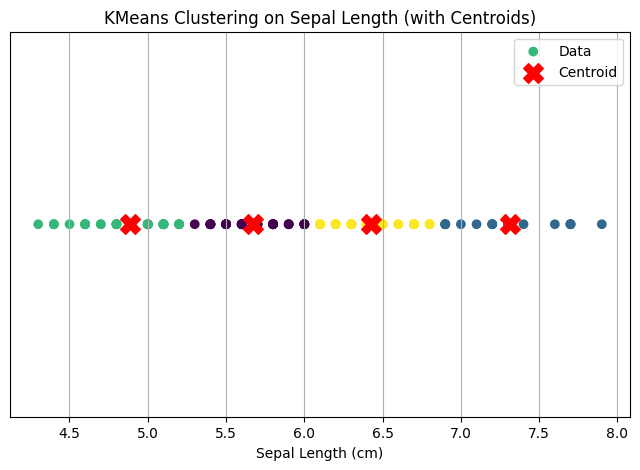

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Gunakan hanya fitur 'sepal length (cm)'
df = df[['sepal length (cm)']]

# KMeans Clustering (4 klaster)
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

# Ambil pusat cluster (centroids)
centroids = kmeans.cluster_centers_

# Set opsi agar seluruh baris tampil
pd.set_option('display.max_rows', None)

# Tampilkan semua hasil clustering dan pusat klaster
print("Hasil klustering (seluruh data):")
print(df)

print("\nPusat cluster (centroid):")
print(centroids)

# Visualisasi hasil klustering dan centroid
plt.figure(figsize=(8, 5))
plt.scatter(df['sepal length (cm)'], [0]*len(df), c=df['cluster'], cmap='viridis', label='Data')
plt.scatter(centroids[:, 0], [0]*len(centroids), c='red', marker='X', s=200, label='Centroid')
plt.xlabel("Sepal Length (cm)")
plt.title("KMeans Clustering on Sepal Length (with Centroids)")
plt.yticks([])  # Hilangkan sumbu Y karena hanya satu fitur
plt.legend()
plt.grid(True)
plt.show()

## Menentukan nilai minimum dan maksimum dari fitur sepal length
Digunakan untuk memahami rentang nilai sepal length sebelum dilakukan diskritisasi atau transformasi lainnya. karena setelah didiskritisasi, nilai sepal length (cm) akan berubah menjadi kategori seperti 'a', 'b', 'c', 'd',

In [11]:
# Cari nilai minimum dan maksimum dari sepal length
min_value = df['sepal length (cm)'].min()
max_value = df['sepal length (cm)'].max()

print(f"Nilai minimum sepal length: {min_value}")
print(f"Nilai maksimum sepal length: {max_value}")


Nilai minimum sepal length: 4.3
Nilai maksimum sepal length: 7.9


## Diskritisasi fitur sepal length
Melakukan diskritisasi fitur sepal length menjadi kategori (a–d) menggunakan kuantil, lalu menerapkan KMeans clustering (k=4) pada fitur lainnya, dan divisualisasikan terhadap nilai sepal length.

Seluruh data hasil clustering:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                   a               3.5                1.4               0.2
1                   a               3.0                1.4               0.2
2                   a               3.2                1.3               0.2
3                   a               3.1                1.5               0.2
4                   a               3.6                1.4               0.2
5                   b               3.9                1.7               0.4
6                   a               3.4                1.4               0.3
7                   a               3.4                1.5               0.2
8                   a               2.9                1.4               0.2
9                   a               3.1                1.5               0.1
10                  b               3.7                1.5               0.2
11                  a               3.4      

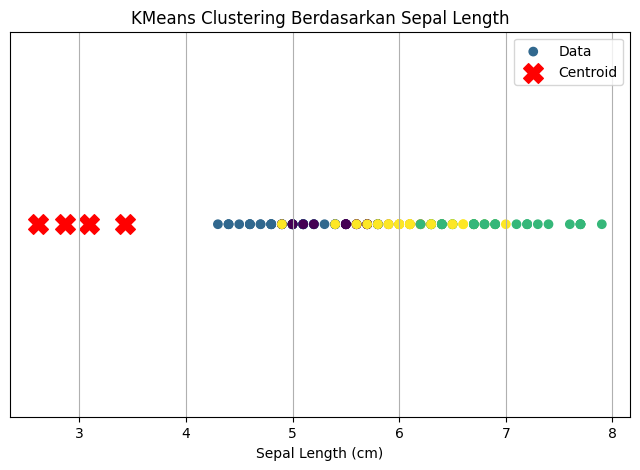

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Konversi 'sepal length (cm)' menjadi 4 kategori: a, b, c, d berdasarkan kuantil
df['sepal length (cm)'] = pd.qcut(df['sepal length (cm)'], q=4, labels=['a', 'b', 'c', 'd'])

# Simpan fitur numerik untuk clustering (selain sepal length)
features_for_clustering = pd.DataFrame(iris.data, columns=iris.feature_names).drop(columns=['sepal length (cm)'])

# KMeans clustering dengan 4 klaster
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(features_for_clustering)

# Ambil pusat cluster
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering.columns)

# Hitung nilai minimum dan maksimum dari fitur numerik
min_vals = features_for_clustering.min()
max_vals = features_for_clustering.max()

# Set opsi Pandas agar semua baris dan kolom tampil
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# === TAMPILKAN HASIL ===
print("Seluruh data hasil clustering:")
print(df.drop(columns=['cluster']))  # ⛔️ Hapus kolom cluster dari tampilan

print("\nPusat cluster (centroid):")
print(centroid_df)

print("\nNilai minimum tiap fitur numerik:")
print(min_vals)

print("\nNilai maksimum tiap fitur numerik:")
print(max_vals)

# === VISUALISASI ===
plt.figure(figsize=(8, 5))
plt.scatter(pd.DataFrame(iris.data, columns=iris.feature_names)['sepal length (cm)'], 
            [0]*len(df), 
            c=df['cluster'], cmap='viridis', label='Data')
plt.scatter(kmeans.cluster_centers_[:, 0], [0]*4, 
            c='red', marker='X', s=200, label='Centroid')
plt.xlabel("Sepal Length (cm)")
plt.title("KMeans Clustering Berdasarkan Sepal Length")
plt.yticks([])  # Menghilangkan sumbu Y karena hanya pakai satu fitur
plt.legend()
plt.grid(True)
plt.show()


## Diskritisasi semua fitur pada data iris
Proses ini mencakup diskritisasi seluruh fitur numerik pada dataset Iris ke dalam kategori berdasarkan kuantil—dengan 4 kategori untuk sepal length dan petal length, serta 3 kategori untuk sepal width dan petal width. Selanjutnya, kategori ini dikonversi ke bentuk numerik melalui label encoding agar dapat diproses oleh algoritma KMeans. Setelah itu, dilakukan klasterisasi dengan KMeans (k=4), dan hasil klaster divisualisasikan menggunakan fitur petal width dan petal length yang telah dikodekan, lengkap dengan tampilan pusat cluster (centroid).

Seluruh data hasil clustering:
    sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
0                   a                c                 a                a
1                   a                b                 a                a
2                   a                b                 a                a
3                   a                b                 a                a
4                   a                c                 a                a
5                   b                c                 b                a
6                   a                c                 a                a
7                   a                c                 a                a
8                   a                a                 a                a
9                   a                b                 a                a
10                  b                c                 a                a
11                  a                c                 a                a
12     

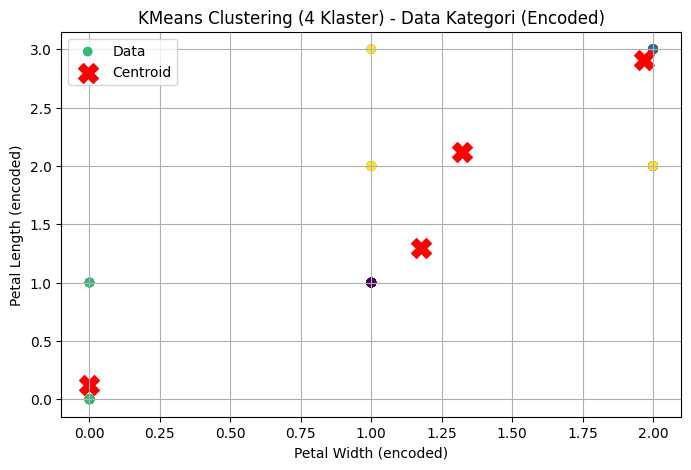

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Konversi fitur menjadi kategori kuantil
df['sepal length (cm)'] = pd.qcut(df['sepal length (cm)'], q=4, labels=['a', 'b', 'c', 'd'])
df['sepal width (cm)'] = pd.qcut(df['sepal width (cm)'], q=3, labels=['a', 'b', 'c'])
df['petal length (cm)'] = pd.qcut(df['petal length (cm)'], q=4, labels=['a', 'b', 'c', 'd'])
df['petal width (cm)'] = pd.qcut(df['petal width (cm)'], q=3, labels=['a', 'b', 'c'])

# Encode kategori untuk clustering
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

# Lakukan clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df_encoded)

# Simpan cluster di df, tapi jangan tampilkan nanti
df['cluster'] = clusters

# Ambil centroid
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.columns)

# Set opsi agar semua baris ditampilkan
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ✅ TAMPILKAN DATA KATEGORI (tanpa kolom cluster)
print("Seluruh data hasil clustering:")
print(df.drop(columns=['cluster']))

# ✅ TAMPILKAN PUSAT CLUSTER
print("\nPusat cluster (centroid) dari data yang dikodekan:")
print(centroids)

# ✅ VISUALISASI
plt.figure(figsize=(8, 5))
plt.scatter(df_encoded['petal width (cm)'],
            df_encoded['petal length (cm)'],
            c=clusters, cmap='viridis', label='Data')
plt.scatter(centroids['petal width (cm)'], centroids['petal length (cm)'],
            c='red', marker='X', s=200, label='Centroid')
plt.xlabel("Petal Width (encoded)")
plt.ylabel("Petal Length (encoded)")
plt.title("KMeans Clustering (4 Klaster) - Data Kategori (Encoded)")
plt.legend()
plt.grid(True)
plt.show()


## Klasifikasi dengan Naive Bayes dan Decision Tree
Model klasifikasi Naive Bayes dan Decision Tree diterapkan pada dua versi data:
1. Data asli (belum didiskritisasi): Menggunakan fitur numerik asli dari dataset Iris.
2. Data yang telah didiskritisasi: Menggunakan versi fitur yang telah dikonversi menjadi kategori dan di-encode menjadi angka.  

Setiap model dievaluasi dengan akurasi dan classification report untuk melihat performa prediksi terhadap tiga kelas spesies Iris.

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load data asli
iris = load_iris()
X_original = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 2. Diskritisasi dengan qcut
df = X_original.copy()
df['sepal length (cm)'] = pd.qcut(df['sepal length (cm)'], q=4, labels=['a', 'b', 'c', 'd'])
df['sepal width (cm)'] = pd.qcut(df['sepal width (cm)'], q=3, labels=['a', 'b', 'c'])
df['petal length (cm)'] = pd.qcut(df['petal length (cm)'], q=4, labels=['a', 'b', 'c', 'd'])
df['petal width (cm)'] = pd.qcut(df['petal width (cm)'], q=3, labels=['a', 'b', 'c'])

# Label encoding
X_discretized = df.apply(lambda col: col.astype('category').cat.codes)

# 3. Split data (original dan discretized)
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_original, y, test_size=0.3, random_state=42)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_discretized, y, test_size=0.3, random_state=42)

# 4. Model: Naive Bayes dan Decision Tree (Original)
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)

nb.fit(Xo_train, yo_train)
dt.fit(Xo_train, yo_train)

print("=== Naive Bayes (Original Data) ===")
print(classification_report(yo_test, nb.predict(Xo_test)))
print("Akurasi:", accuracy_score(yo_test, nb.predict(Xo_test)))

print("\n=== Decision Tree (Original Data) ===")
print(classification_report(yo_test, dt.predict(Xo_test)))
print("Akurasi:", accuracy_score(yo_test, dt.predict(Xo_test)))

# 5. Model: Naive Bayes dan Decision Tree (Discretized)
nb.fit(Xd_train, yd_train)
dt.fit(Xd_train, yd_train)

print("\n=== Naive Bayes (Discretized Data) ===")
print(classification_report(yd_test, nb.predict(Xd_test)))
print("Akurasi:", accuracy_score(yd_test, nb.predict(Xd_test)))

print("\n=== Decision Tree (Discretized Data) ===")
print(classification_report(yd_test, dt.predict(Xd_test)))
print("Akurasi:", accuracy_score(yd_test, dt.predict(Xd_test)))


=== Naive Bayes (Original Data) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Akurasi: 0.9777777777777777

=== Decision Tree (Original Data) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Akurasi: 1.0

=== Naive Bayes (Discretized Data) ===
              precision    recall  f1-score   support

           0       1.00    

menjelaskan proses diskritisasi menggunakan k-means klustering pada data iris dan lakukan klasifikasi dengan model naive bayes dan pohon keputusan pada data yang sudah di discretisasi dan belum didiscretasi dikumpulkan di web statis


klasifikasi data kategorikal bandingkan hasil klasifikasi dengan kategorisasi dan tanpa kategorisasi
cerita prosesnya

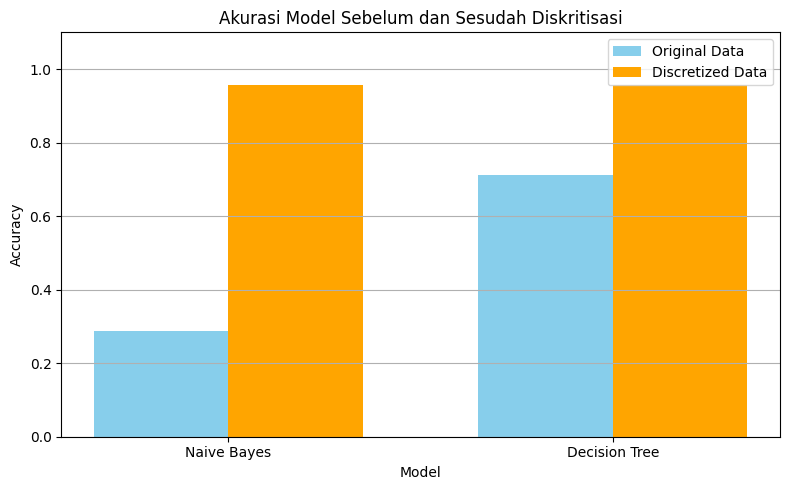

In [31]:
import matplotlib.pyplot as plt

# Simpan akurasi
akurasi_nb_ori = accuracy_score(yo_test, nb.predict(Xo_test))
akurasi_dt_ori = accuracy_score(yo_test, dt.predict(Xo_test))
akurasi_nb_dis = accuracy_score(yd_test, nb.predict(Xd_test))
akurasi_dt_dis = accuracy_score(yd_test, dt.predict(Xd_test))

# Visualisasi
labels = ['Naive Bayes', 'Decision Tree']
original = [akurasi_nb_ori, akurasi_dt_ori]
discretized = [akurasi_nb_dis, akurasi_dt_dis]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, original, width=width, label='Original Data', color='skyblue')
plt.bar([i + width for i in x], discretized, width=width, label='Discretized Data', color='orange')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Akurasi Model Sebelum dan Sesudah Diskritisasi')
plt.xticks([i + width / 2 for i in x], labels)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
